In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\placement.csv")

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
# CHECK NULL VALUES

pd.DataFrame((df.isnull().sum()/len(df))*100,columns=["missing value percentage"])

,missing value percentage
cgpa,0.0
placement_exam_marks,0.0
placed,0.0


In [5]:
# OUTLIER TREATEMENT

df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [6]:
def box_plot(column):
    sns.boxplot(df[column])
    plt.show()

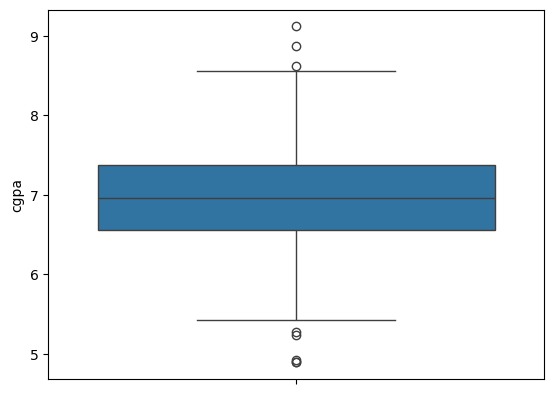

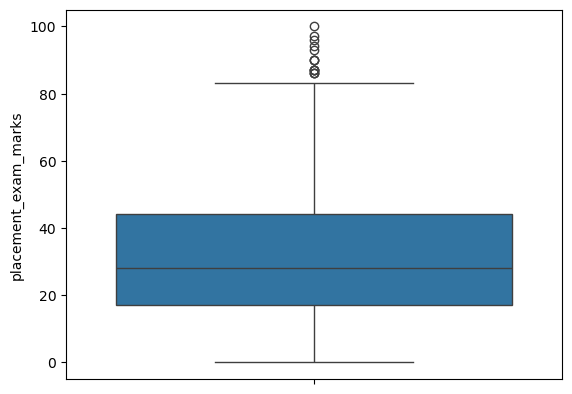

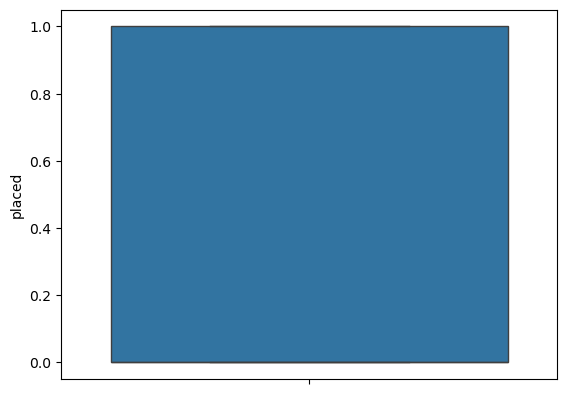

In [7]:
for i in df.columns:
    box_plot(i)

In [8]:
# CAPPING METHOD

columns_to_be_treated = ["cgpa","placement_exam_marks"]

In [9]:
def outlier_capping(col):
    # upper_limit = df[col].mean() + 3*df[col].std()
    # lower_limit = df[col].mean() - 3*df[col].std()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    df[col] = np.where(df[col] > upper_limit,upper_limit,
                       np.where(df[col] < lower_limit,lower_limit,df[col]))

In [10]:
for i in columns_to_be_treated:
    outlier_capping(i)

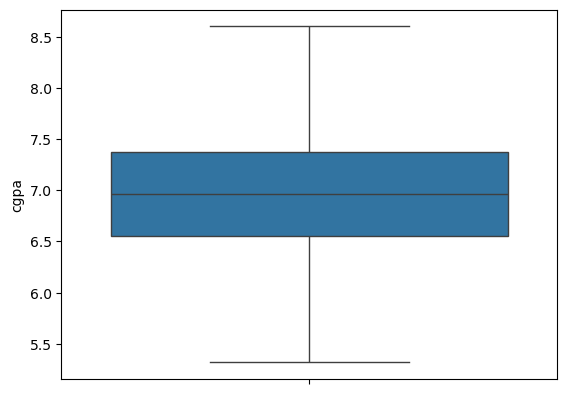

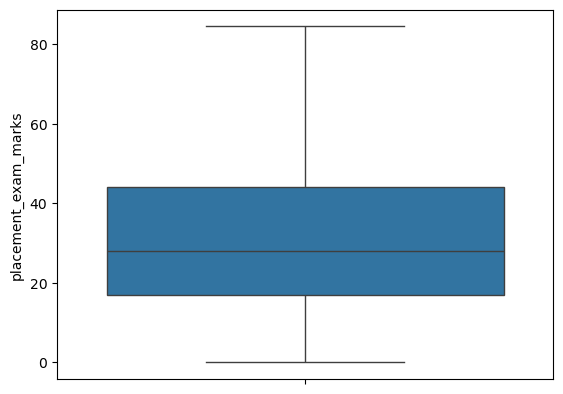

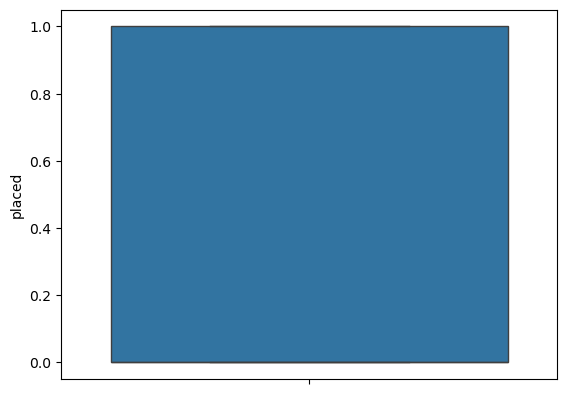

In [11]:
for col in df.columns:
    box_plot(col)

In [12]:
# FEATURE SCALING

x = df.iloc[:,:-1]
y = df["placed"]

In [13]:
x, y

(     cgpa  placement_exam_marks
 0    7.19                  26.0
 1    7.46                  38.0
 2    7.54                  40.0
 3    6.42                   8.0
 4    7.23                  17.0
 ..    ...                   ...
 995  8.60                  44.0
 996  8.60                  65.0
 997  5.32                  34.0
 998  8.60                  46.0
 999  5.32                  10.0
 
 [1000 rows x 2 columns],
 0      1
 1      1
 2      1
 3      1
 4      0
       ..
 995    1
 996    1
 997    0
 998    1
 999    1
 Name: placed, Length: 1000, dtype: int64)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x = pd.DataFrame(sc_x,columns=x.columns)

In [15]:
sc_x

,cgpa,placement_exam_marks
0,0.374692,-0.325440
1,0.818055,0.310962
2,0.949423,0.417029
3,-0.889716,-1.280045
4,0.440375,-0.802743
...,...,...
995,2.690036,0.629164
996,2.690036,1.742869
997,-2.696013,0.098828
998,2.690036,0.735231


In [16]:
# CHECK IMBALANCE DATA

df["placed"].value_counts()

placed
0    511
1    489
Name: count, dtype: int64

In [17]:
# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(sc_x,y,test_size=0.3,random_state=101,stratify=y)

In [18]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((700, 2), (300, 2), (700,), (300,))

In [19]:
# MODEL TRAINING

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_predict_test = lr.predict(x_test)

In [21]:
y_predict_test

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], d

In [22]:
print(np.array(y_test))

[1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1
 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0
 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1
 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1
 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0
 0 0 0 0]
